# Lab 6 - Statistics
## Chapter 9
*Joshua Chamberlain*

## Utility Functions
Functions to create the variables that magically appear in the book.

In [1]:
import pandas as pd
import numpy as np
import itertools
from scipy.stats import pearsonr

def build_pop():   
    ret = pd.read_csv('./NST-EST2009-cleaned.csv', header=1, thousands=',', index_col=0)
    ret.index.set_names(['State'], inplace=True)
    return ret

In [2]:
import pickle

def build_alco():
    with open('alco.pickle', 'rb') as f:
        ret = pickle.load(f)
        ret.drop(columns=['Total'], inplace=True)
    return ret

In [3]:
def build_alco2009():
    data = pd.read_csv('./niaaa-report-filled-in-reversed.csv', index_col=[0, 1])
    return data.xs(2009, level=1)

## Unit 47: Doing Status the Python Way

### Page 153

In [4]:
import numpy.random as rnd
rnd.seed(1)

In [5]:
alco = build_alco() # Create the variable that mysteriously appears in the book.

beer_seriesNY = alco.loc['New York']['Beer']
beer_seriesCA = alco.loc['California']['Beer']

beer_seriesNY.corr(beer_seriesCA)

0.9709778539165481

In [6]:
beer_seriesCA.cov(beer_seriesNY)

0.017438162878787876

In [7]:
[x.skew() for x in (beer_seriesCA, beer_seriesNY)]

[0.1645729129297682, 0.3283810058631073]

In [8]:
frameNY = alco.loc['New York']
frameNY.skew()

Beer       0.328381
Wine       0.127308
Spirits    0.656699
dtype: float64

In [9]:
frameNY.corr()

,Beer,Wine,Spirits
Beer,1.000000,0.470690,0.908969
Wine,0.470690,1.000000,0.611923
Spirits,0.908969,0.611923,1.000000


In [10]:
frameNY.cov()

,Beer,Wine,Spirits
Beer,0.016103,0.002872,0.026020
Wine,0.002872,0.002312,0.006638
Spirits,0.026020,0.006638,0.050888


### Page 154

In [11]:
pop = build_pop() # Create the variable that mysteriously appears in the book.

pop_seriesNY = pop.loc['New York'][:-2]
pop_seriesNY.index = pop_seriesNY.index.str.split().str[-1].astype(int)

frameNY.loc[2000:2009].corrwith(pop_seriesNY)

Beer      -0.520878
Wine       0.936026
Spirits    0.957697
dtype: float64

In [12]:
from scipy.stats import pearsonr

pop_sorted = pop_seriesNY.sort_index()
alco_10 = alco.loc['New York'][-10:]

corrs = [(bev,) + pearsonr(alco_10[bev], pop_sorted) for bev in alco_10.columns]
pd.DataFrame(corrs, columns=("bev", "r", "p-value")).set_index("bev")
                           

,r,p-value
bev,,
Beer,-0.520878,0.122646
Wine,0.936026,0.000068
Spirits,0.957697,0.000013


### Page 155

In [13]:
alco2009 = build_alco2009() # Create the variable that mysteriously appears in the book.
alco2009.corr()


,Beer,Wine,Spirits
Beer,1.000000,-0.031560,0.452279
Wine,-0.031560,1.000000,0.599791
Spirits,0.452279,0.599791,1.000000


In [14]:
pearsonr(alco2009['Wine'], alco2009['Beer'])

(-0.031560488300856844, 0.825984813107873)

In [15]:
# Code not in book, but the graph is. I added this code for practice and to make it easier to correlate to the book.
import matplotlib, matplotlib.pyplot as plt
plt.title('Wine and Beer Consumption per Capita in the USA in 2009')
plt.scatter(alco2009.Wine, alco2009.Beer, c='g')
plt.xlabel('Wine')
plt.ylabel('Beer')


Text(0,0.5,'Beer')

## Your Turn

### Twenty-First Century S&P 500* 
> Write a program that reports some basic statistical measures of the closing values of the S&P 500 stock index: the mean, standard deviation, skewness, and correlation between the closing values and trading volume in the twenty-first century. Is the correlation reliable? You can download the historical prices from Yahoo! Finance.[42](https://finance.yahoo.com/quote/%5EGSPC/history?period1=978332400&period2=1538460000&interval=1d&filter=history&frequency=1d) Remember that the twenty-first century began on January 1, 2001.

I downloaded the data into [GSPC.csv](./GSPC.csv).


#### Load the Data

In [16]:
data = pd.read_csv('GSPC.csv', usecols=['Date', 'Close', 'Volume'], index_col='Date')
data.head()

,Close,Volume
Date,,
2001-01-02,1283.270020,1129400000
2001-01-03,1347.560059,1880700000
2001-01-04,1333.339966,2131000000
2001-01-05,1298.349976,1430800000
2001-01-08,1295.859985,1115500000


#### Analyze the Data

In [17]:
import IPython.display
df = pd.DataFrame(index=['Mean', 'Standard Deviation', 'Skewness', 'Correlation'])
df['Closing Values'] = [
    data.Close.mean(),
    data.Close.std(),
    data.Close.skew(),
    data.Close.corr(data.Volume)
]
df['Trading Volume'] = [
    data.Volume.mean(),
    data.Volume.std(),
    data.Volume.skew(),
    data.Volume.corr(data.Close)
]

print("Basic Statistical Measures")
display(df)

Basic Statistical Measures


,Closing Values,Trading Volume
Mean,1492.259445,3.169026e+09
Standard Deviation,508.496805,1.466269e+09
Skewness,0.978527,7.023795e-01
Correlation,0.141690,1.416902e-01


*To better understand the correlation, I also want a $p$ value.*

In [18]:
cor, p = pearsonr(data.Close, data.Volume)
print("The correlation of %f has p=%E" % (cor, p))

The correlation of 0.141690 has p=1.848666E-21


#### Sanity Check
The tiny value of $p$ made me think I did something wrong. I expected a large value of $p$ because these features should be unrelated. I decided to plot the data for my sanity.

Text(0,0.5,'Trading Volume')

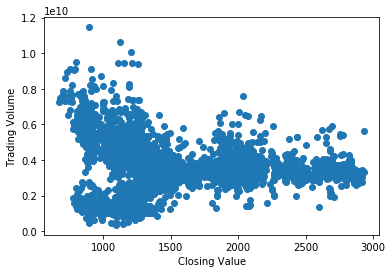

In [19]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt

plt.scatter(data.Close, data.Volume)
plt.xlabel("Closing Value")
plt.ylabel("Trading Volume")


This looks like a downward trend, so I thought the correlation should have been negative. Surely I did something wrong, right? Well, let's check. I used `numpy` to fit a trend line. For a positive correlation, the slope of the line should be positive. Let's see.

Text(0,0.5,'Trading Volume')

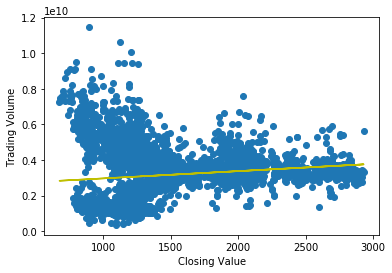

In [20]:
import numpy as np

m, b = np.polyfit(data.Close, data.Volume, 1)
trend = data.Close * m + b


plt.scatter(data.Close, data.Volume)
plt.plot(data.Close, trend, c='y')
plt.xlabel("Closing Value")
plt.ylabel("Trading Volume")



The trend line is actually going up, meaning the correlation value should actually be positive. It looks like the numbers are actually sane.

#### Summary
With extremely high certainty ($p\approx0$), there is a positive correlation between closing value and trading volume. This suggests that the more people trade, the higher the closing cost will be. Based on the $p$ value alone, this correlation is reliable. However, the correlation is so small, I would not consider it reliable.


### Network of Nutrients***
> The United States Department of Agriculture (USDA) nutrient database[43](https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/nutrient-data-laboratory/docs/sr28-download-files/) contains information about approximately 9,000 food items and 150 constituent nutrients. Let's say that two nutrients are similar if their amounts in all food items are strongly and reliably correlated: the correlation is greater than 0.7 and the p-value is less than 0.01. Write a program that uses the nutrition data in the file `NUT_DATA.txt` to construct a network of similar nutrients (you may need to revisit Unit 40, *Harnessing Networkx*). Each nutrient in the network is a node, and two nodes are connected if two nutrients are similar. Does the network have any community structure? If it does, what nutrients go together?



#### Load the Data
Load the statistics about the different nutrients from one file, and the names of the nutrients from another.

In [21]:
import pandas as pd

fields = [
    'Food', # NDB_No in the documentation
    'Nutrient', # Nutr_No in the documentation
    'Amount', # Nutr_Val in the documentation
    # Other columns we don't care about
    'Num_Data_Pts','Std_Error','Src_Cd','Driv_Cd','Ref_NDB_No','Add_Nutr_Mark','Num_Studies', 'Min', 'Max','DF', 'Low_EB','Up_EB','Stat_cmt','AddMod_Data','CC']

data = pd.read_csv('sr28asc/NUT_DATA.txt', delimiter='^', encoding='latin-1', header=None, names=fields,
                       usecols=['Food', 'Nutrient', 'Amount'])
data.Food = data.Food.apply(lambda x: x[1:-1]) # Remove the tildes from ~<ID>~
data.Nutrient = data.Nutrient.apply(lambda x: x[1:-1]) # Remove the tildes from ~<ID>~
data.head()


,Food,Nutrient,Amount
0,01001,203,0.85
1,01001,204,81.11
2,01001,205,0.06
3,01001,207,2.11
4,01001,208,717.00


In [22]:
fields = [
    'id', # 'Nutr_No'
    'Units',
    'tag', # Tagname
    'desc', # NutrDesc
    'Num_Dec', 'SR_Order']

raw_nut_names = pd.read_csv('sr28asc/NUTR_DEF.txt', delimiter='^', encoding='latin-1', header=None, names=fields,
                       usecols=[0,2,3])
nut_names = raw_nut_names.applymap(lambda x: x[1:-1])
nut_names.set_index('id', inplace=True)
nut_names.head()

,tag,desc
id,,
203,PROCNT,Protein
204,FAT,Total lipid (fat)
205,CHOCDF,"Carbohydrate, by difference"
207,ASH,Ash
208,ENERC_KCAL,Energy


#### Munge the Data
The data is based on a relational database, so each row basically has a key for the type of food and type of nutrient. I want to be able to use this table with `pearsonr`. This means I need to create a column for every unique Nutrient value.

I assume that missing values mean that a given nutrient is not present in a certain food, so I fill `NaN`s with `0`.

In [23]:
amount_per_nutrient = data.pivot(index='Food', columns='Nutrient', values='Amount')
amount_per_nutrient.fillna(value=0, inplace=True)
amount_per_nutrient.head()

Nutrient,203,204,205,207,208,209,210,211,212,213,...,696,697,851,852,853,855,856,857,858,859
Food,,,,,,,,,,,,,,,,,,,,,
01001,0.85,81.11,0.06,2.11,717.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.315,0.000,0.000,0.0,0.000,0.0,0.00,0.0
01002,0.49,78.30,2.87,1.62,718.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.285,0.005,0.081,0.0,0.008,0.0,0.02,0.0
01003,0.28,99.48,0.00,0.00,876.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.00,0.0
01004,21.40,28.74,2.34,5.11,353.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.00,0.0
01005,23.24,29.68,2.79,3.18,371.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.00,0.0


Also, there are some missing values from the nutrient names, so that has to be fixed.

In [24]:
nut_names.tag.replace(to_replace='', value='(no name)', inplace=True)
nut_names.desc.replace(to_replace='', value='(no description)', inplace=True)
nut_names['display'] = nut_names.tag + ' ' + nut_names.desc
nut_names.head()

,tag,desc,display
id,,,
203,PROCNT,Protein,PROCNT Protein
204,FAT,Total lipid (fat),FAT Total lipid (fat)
205,CHOCDF,"Carbohydrate, by difference","CHOCDF Carbohydrate, by difference"
207,ASH,Ash,ASH Ash
208,ENERC_KCAL,Energy,ENERC_KCAL Energy


#### Analyze the Data
Run `pearsonr` on every possible edge to determine if it should be added to the network.

In [25]:
# Every nutrient is a node
nodes = amount_per_nutrient.columns.values

# Get a list of every possible combination
candidates = list(itertools.combinations(nodes, 2))

# Run pearsonr to get the similarity between the two nodes of each tuple
sim = [pearsonr(amount_per_nutrient[i], amount_per_nutrient[j]) for (i, j) in candidates]

# Create a mask for valid edges, those with a correlation > 0.7 and a p value < 0.01
valid_edge = [(c > 0.7 and p < 0.01) for (c,p) in sim]

# Use that mask to create a list of edges
edges = np.array(list(candidates))[valid_edge]

**Use the list of edges to find cliques with `networkx`**

The `find_cliques` method from `networkx` considers isolated nodes to be a clique of 1. Therefore, I'm measuring cliques prior to adding all nodes.

In [26]:
import networkx as nx

G = nx.Graph()

G.add_edges_from(edges)
clique_list = list(nx.find_cliques(G))
clique_sizes = np.array([len(x) for x in clique_list])
cliques = [', '.join([nut_names.display[x] for x in y ]) for y in clique_list]

print("There are %d cliques, with %.3f nutrients per clique:" % (len(cliques), clique_sizes.mean()))
print('\t' + '\n\t'.join(cliques))

There are 29 cliques, with 2.966 nutrients per clique:
	F18D2CLA 18:2 CLAs, F17D0 17:0
	ILE_G Isoleucine, TRP_G Tryptophan, PRO_G Proline, ASP_G Aspartic acid, HISTN_G Histidine, LYS_G Lysine, MET_G Methionine, ALA_G Alanine, PROCNT Protein, TYR_G Tyrosine, GLY_G Glycine, SER_G Serine, LEU_G Leucine, ARG_G Arginine, THR_G Threonine, CYS_G Cystine, GLU_G Glutamic acid, VAL_G Valine, PHE_G Phenylalanine
	GLUS Glucose (dextrose), FRUS Fructose
	VITD Vitamin D, VITD Vitamin D (D2 + D3)
	F8D0 8:0, F10D0 10:0
	FATRNP Fatty acids, total trans-polyenoic, (no name) 18:2 i, FATRN Fatty acids, total trans, FATRNM Fatty acids, total trans-monoenoic, F18D1T 18:1 t
	FATRNP Fatty acids, total trans-polyenoic, (no name) 18:3i
	TOCPHG Tocopherol, gamma, TOCPHD Tocopherol, delta
	F16D0 16:0, F18D0 18:0, FASAT Fatty acids, total saturated
	F16D0 16:0, FAT Total lipid (fat), FASAT Fatty acids, total saturated
	F16D0 16:0, FAT Total lipid (fat), FAMS Fatty acids, total monounsaturated, F18D1 18:1 undiffere

**Look for isolated nodes**

So far, isolated nodes will not exist in the graph. I only added nodes by adding edges. Now I'll add every node.


In [27]:
G.add_nodes_from(nut_names.index.values)
# isolated = list(nx.isolates(G))


isolated = [nut_names.display[x] for x in nx.isolates(G)]
print("There are %d isolated nodes. The first 10:" % len(isolated))
print('\t' + '\n\t'.join(isolated[:10]))

There are 77 isolated nodes. The first 10:
	CA Calcium, Ca
	MG Magnesium, Mg
	LYCPN Lycopene
	VITC Vitamin C, total ascorbic acid
	SE Selenium, Se
	F22D1C 22:1 c
	MN Manganese, Mn
	SUGAR Sugars, total
	F16D1C 16:1 c
	CU Copper, Cu


#### Summary
Just over half of the nutrients (77 out of 150) do not have a significant similarity to any other nutrient. For those that do, their communities are typically small (on average just under 3).